# 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

# 1. 데이터 로드

In [2]:
df = pd.read_excel('최종본.xlsx')
df.head()

,year,month,day,ws,ta,hm,rn,result
0,2019,1,1,3.0,4.1,36,0.0,0
1,2019,1,2,3.9,4.2,30,0.0,1
2,2019,1,3,5.1,5.3,20,0.0,1
3,2019,1,4,5.8,6.3,20,0.0,0
4,2019,1,5,4.4,7.0,40,0.0,1


In [3]:
result_counts = df['result'].value_counts(normalize=True) * 100  # 비율(%)
print("result 0과 1의 비율:")
print(result_counts)

result 0과 1의 비율:
result
0    75.945205
1    24.054795
Name: proportion, dtype: float64


# 2. 특징과 레이블 선택

In [5]:
X = df[['year', 'month', 'day', 'ws', 'ta', 'hm', 'rn']]  # 특징
y = df['result']  # 레이블

# 3. 데이터 분할
(훈련/검증 세트, 비율: 90:10)   

In [6]:
# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [7]:
import xgboost as xgb

In [8]:
model = xgb.XGBClassifier(n_estimators=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

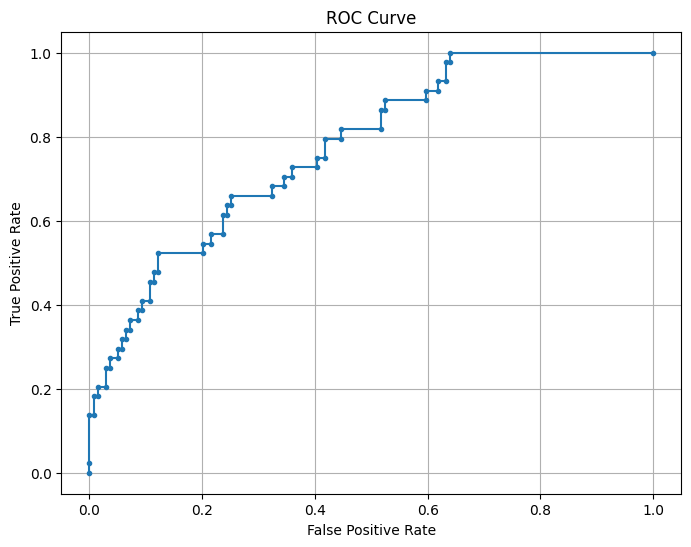

Optimal Threshold: 0.2878735363483429


In [9]:
import matplotlib.pyplot as plt

# 예측 확률
y_scores = model.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

# 최적의 threshold 찾기 (TPR와 FPR의 차이가 가장 큰 지점)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# 5. 예측 및 평가

In [10]:
# 최적의 threshold를 사용하여 예측
y_val_pred = (y_scores >= optimal_threshold).astype(int)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, y_val_pred))
print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, y_scores))
print("검증 세트 보고서:\n", classification_report(y_test, y_val_pred))

검증 세트 정확도: 0.726775956284153
검증 세트 ROC AUC 점수: 0.7748528449967299
검증 세트 보고서:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       139
           1       0.45      0.66      0.54        44

    accuracy                           0.73       183
   macro avg       0.66      0.70      0.67       183
weighted avg       0.77      0.73      0.74       183



In [11]:
test_pred = model.predict(X_test)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, test_pred))
print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("검증 세트 보고서:\n", classification_report(y_test, test_pred))

검증 세트 정확도: 0.7868852459016393
검증 세트 ROC AUC 점수: 0.7748528449967299
검증 세트 보고서:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       139
           1       0.56      0.50      0.53        44

    accuracy                           0.79       183
   macro avg       0.71      0.69      0.70       183
weighted avg       0.78      0.79      0.78       183

